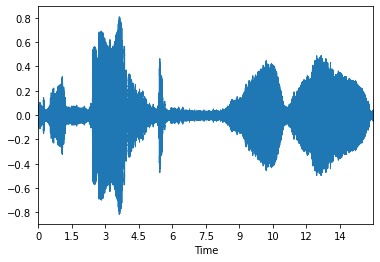

In [2]:
import librosa
import librosa.display

filename = '/content/hmpback1.wav'
y, sr = librosa.load(filename)
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr)



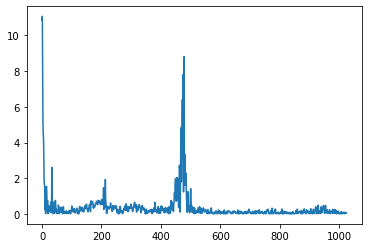

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_fft =  2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

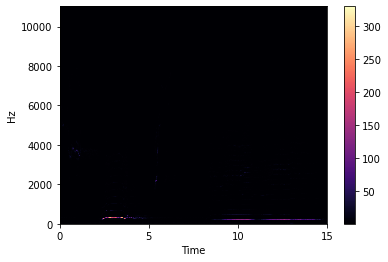

In [4]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft, hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

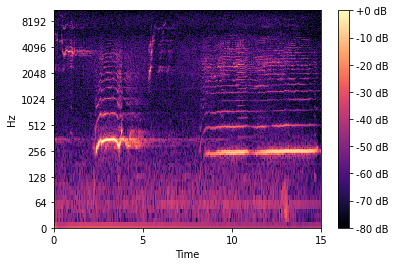

In [5]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

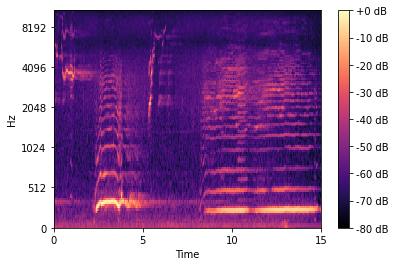

In [6]:
n_mels = 128
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [ ]:
#use early stopping to optimally terminate training through callbacks
from tensorlfow.python.keras.callbacks import Earlystopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', model='min', verbose=1, patience=5)

mc = ModelCheckPoint('')

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hmpback1.wav to hmpback1.wav
User uploaded file "hmpback1.wav" with length 330796 bytes


In [16]:
import cv2

In [14]:
class OrcaNet:
  @staticmethod
  def extract_features(image_path, vector_size=32):
    image = image_path#imread(image_path, mode="RGB")
    try:
        # Using KAZE, cause SIFT, ORB and other was moved to additional module
        # which is adding addtional pain during install
        alg = cv2.KAZE_create()
        # Dinding image keypoints
        kps = alg.detect(image)
        # Getting first 32 of them. 
        # Number of keypoints is varies depend on image size and color pallet
        # Sorting them based on keypoint response value(bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        # computing descriptors vector
        kps, dsc = alg.compute(image, kps)
        # Flatten all of them in one big vector - our feature vector
        dsc = dsc.flatten()
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if dsc.size < needed_size:
            # if we have less the 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print('Error: ', e)
        return None

    return dsc

In [19]:
feat_vector = OrcaNet.extract_features(S_DB, 512) #extract_features(S_DB)

In [18]:
from sklearn import tree, ensemble
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

forest = ensemble.RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

[ 0.02634611 -0.00334779  0.07197444 ...  0.00576754  0.05034817
  0.04804835]


[ 0.02634611 -0.00334779  0.07197444 ...  0.06837799  0.01704521
  0.24350984]
